# Importing Data and Libraries

In [261]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Importing Dataset
url = "Downloads/student+performance/student-mat.csv"
cols = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime", "failures", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3"]
df = pd.read_csv(url)

#df[cols] = df.iloc[:, 0].str.split(';', expand=True)
df[cols] = df.iloc[:, 0].str.replace('"', '', regex=False).str.split(';', expand=True)

# Optionally, drop the original first column if it's no longer needed
df.drop(columns=df.columns[0], inplace=True)

for column in df.columns:
    # Attempt to convert the column to numeric
    converted_column = pd.to_numeric(df[column], errors='coerce')
    
    # Check if conversion resulted in NaNs and original column is not completely numeric
    if converted_column.notna().any() and (converted_column.isna().sum() < len(df[column])):
        df[column] = converted_column  # Update the column with the converted values

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Exploratory Data Analysis (EDA)

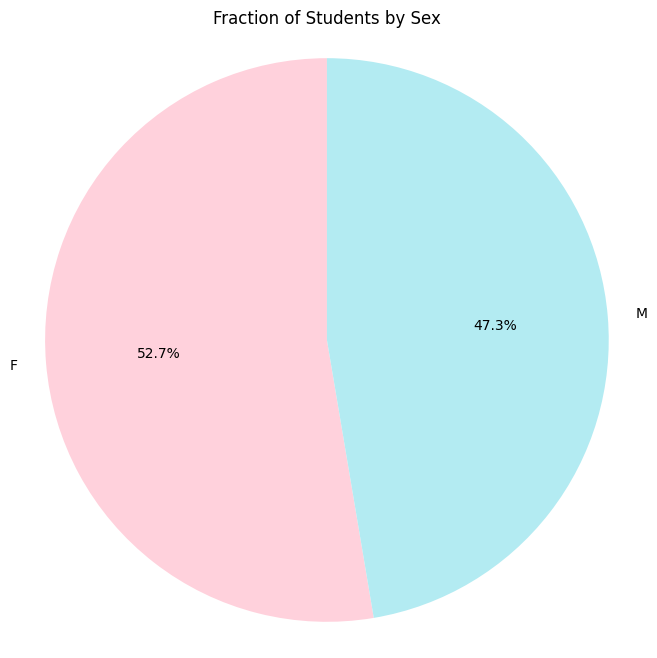

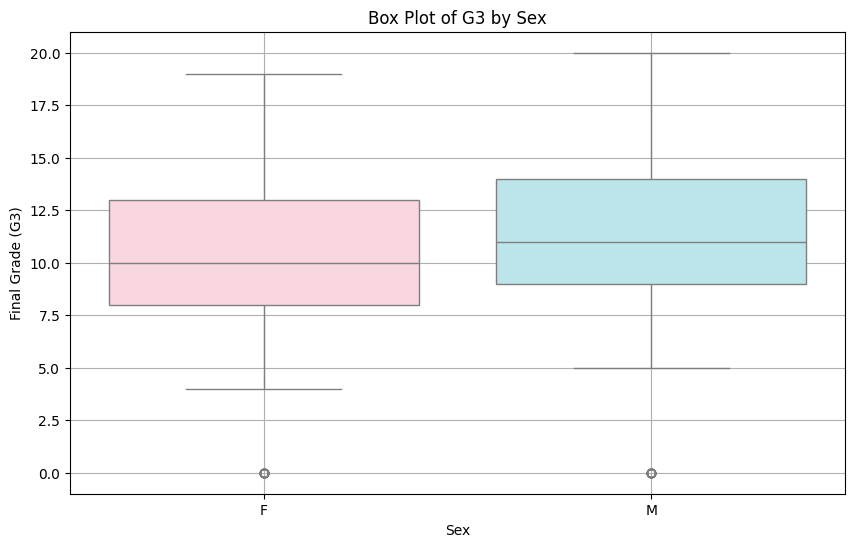

In [262]:
# Pie Chart for M/F distribution
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FFD1DC', '#B3EBF2'])
plt.title('Fraction of Students by Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Box-Plot for G3 by sex
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='G3', hue='sex', palette=['#FFD1DC', '#B3EBF2'])
plt.title('Box Plot of G3 by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Grade (G3)')
plt.grid()
plt.show()

We see that male students tend to do slightly better their female peers in Mathematics. This could be attributed to gender bias in STEM-related subjects, such as this study's Mathematics. However, the difference is relatively small and will not be looked into further for this project.

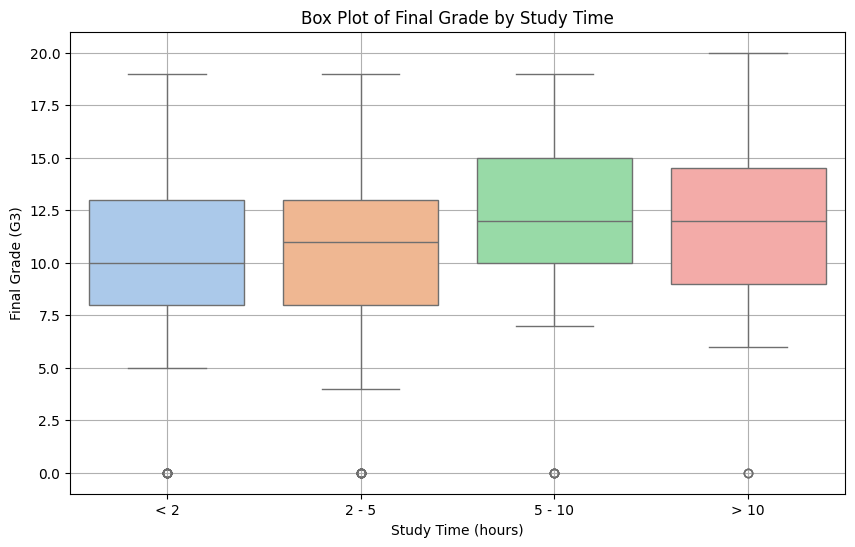

In [263]:
# Box-Plot for students' final grade categorized by their studytime 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='studytime', y='G3', hue='studytime', palette='pastel', legend=False)
plt.title('Box Plot of Final Grade by Study Time')
plt.xlabel('Study Time (hours)')
plt.ylabel('Final Grade (G3)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['< 2', '2 - 5', '5 - 10', '> 10'])
plt.grid()
plt.show()

We observe that there is a subtle increase in final grade for students with longer study times. Intuitively, you would think that those who study the least would score the worst but it appears to be only a small difference. Notably, those who study 5-10 hours have the highest minimum grade. We can also note the difference between 5-10 hours and >10 hours where every statistic (besides maximum) is less for >10 hours. Perhaps there are external factors that affect this such as smarter students needing less time to study, or longer study times leading to burnout.

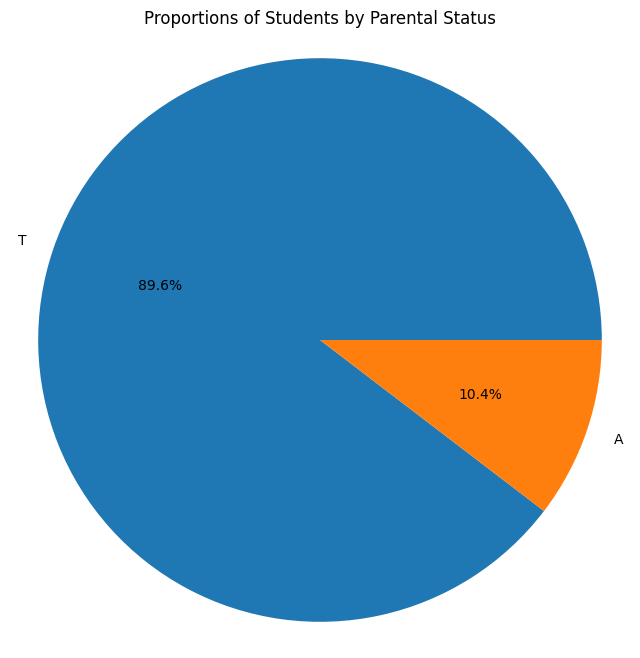

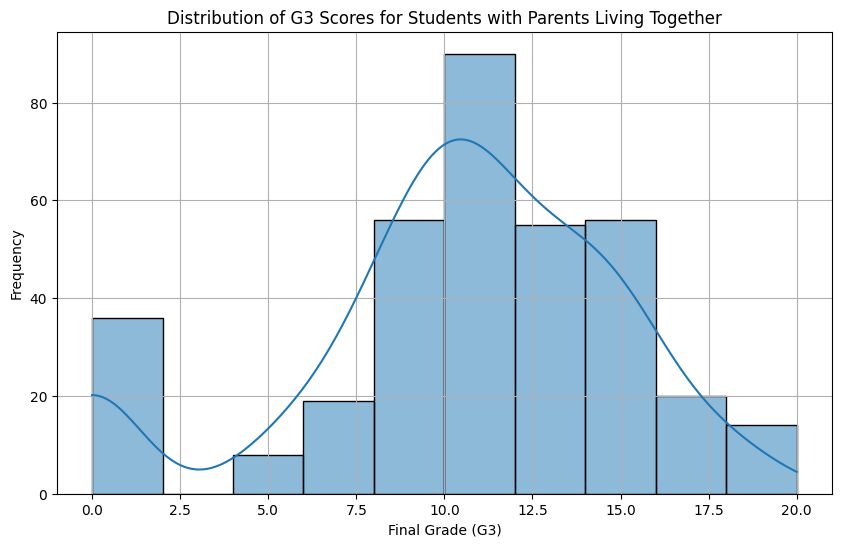

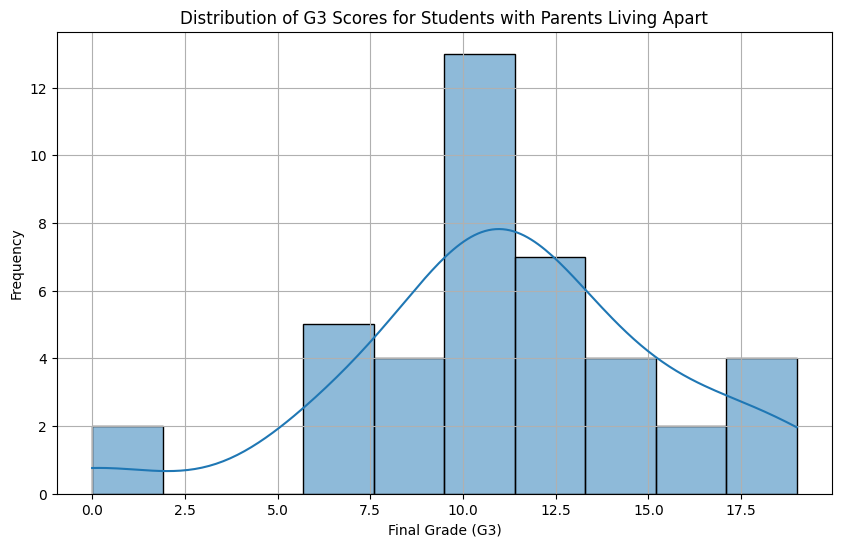

In [264]:
# Comparing studets' G3 based on their Pstatus

# Pie chart for the students' parental status
count_pstatus = df['Pstatus'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(count_pstatus, labels=count_pstatus.index, autopct='%1.1f%%')
plt.title('Proportions of Students by Parental Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Filter the DataFrame for students with Pstatus = 'T'
df_pstatus = df[df['Pstatus'] == 'T']

# Histogram for G3 scores of students with Pstatus = 'T'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pstatus, x='G3', bins=10, kde=True)  # Add kernel density estimate
plt.title('Distribution of G3 Scores for Students with Parents Living Together')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# Filter the DataFrame for students with Pstatus = 'A'
df_pstatus = df[df['Pstatus'] == 'A']

# Histogram for G3 scores of students with Pstatus = 'A'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pstatus, x='G3', bins=10, kde=True)  # Add kernel density estimate
plt.title('Distribution of G3 Scores for Students with Parents Living Apart')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

We see similar trends for the distribution of students' final grades in spite of the difference in parental living status. Perhaps this indicates that grades are not affected by whether or not a student's parents are living together. Let's look at the first and second period grades as well.

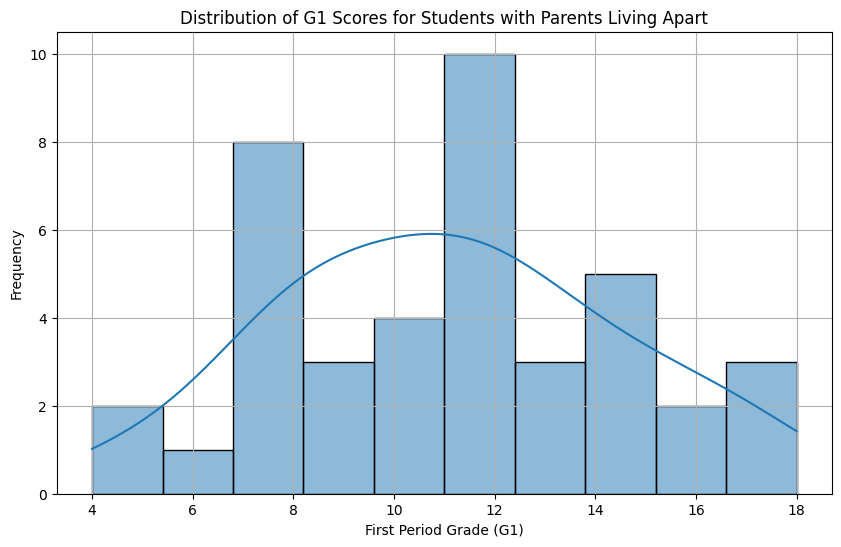

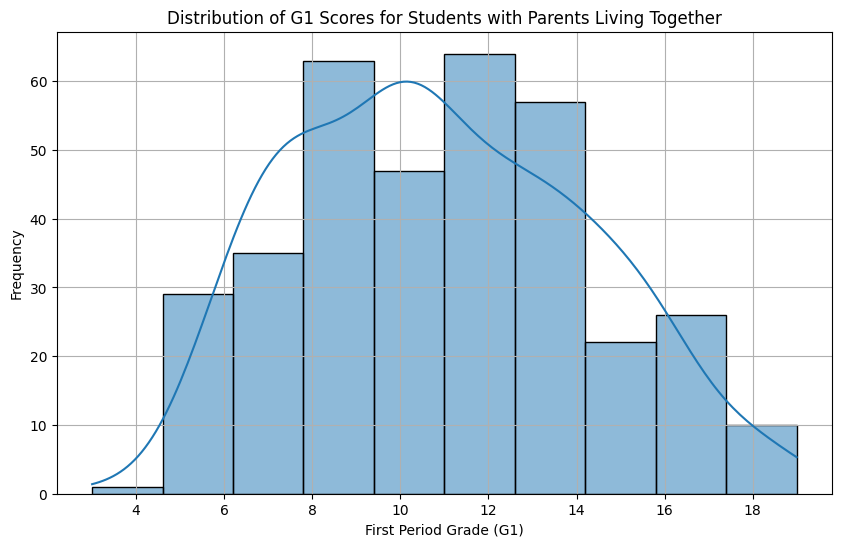

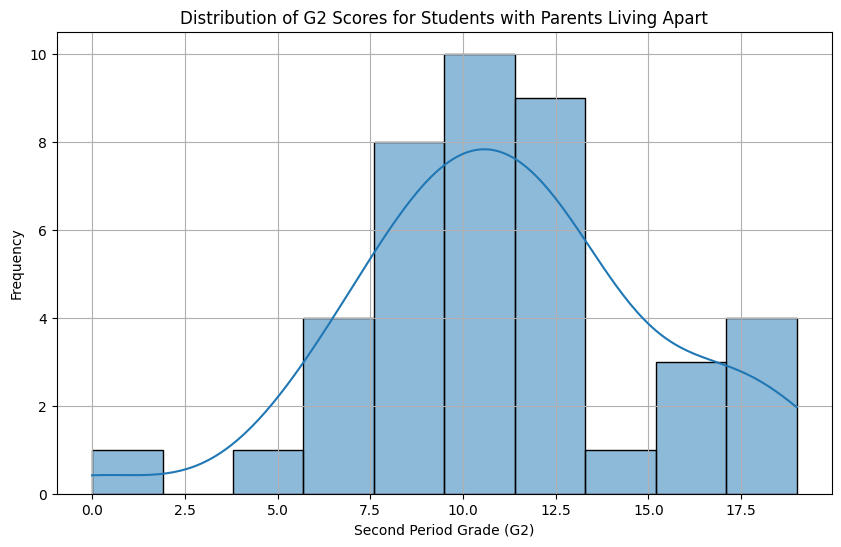

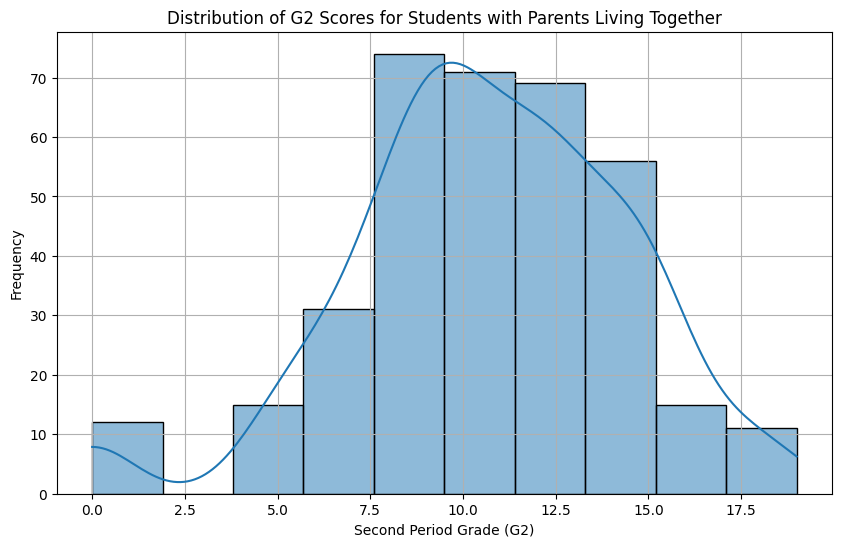

In [265]:
# Looking at First and Second Period Grades vs Pstatus
df_pstatus = df[df['Pstatus'] == 'A']
# Create a histogram for G1 scores of students with Pstatus = 'A'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pstatus, x='G1', bins=10, kde=True)  # Add kernel density estimate
plt.title('Distribution of G1 Scores for Students with Parents Living Apart')
plt.xlabel('First Period Grade (G1)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

df_pstatus = df[df['Pstatus'] == 'T']
# Create a histogram for G1 scores of students with Pstatus = 'T'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pstatus, x='G1', bins=10, kde=True)  # Add kernel density estimate
plt.title('Distribution of G1 Scores for Students with Parents Living Together')
plt.xlabel('First Period Grade (G1)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


df_pstatus = df[df['Pstatus'] == 'A']
# Create a histogram for G2 scores of students with Pstatus = 'A'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pstatus, x='G2', bins=10, kde=True)  # Add kernel density estimate
plt.title('Distribution of G2 Scores for Students with Parents Living Apart')
plt.xlabel('Second Period Grade (G2)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

df_pstatus = df[df['Pstatus'] == 'T']
# Create a histogram for G2 scores of students with Pstatus = 'T'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pstatus, x='G2', bins=10, kde=True)  # Add kernel density estimate
plt.title('Distribution of G2 Scores for Students with Parents Living Together')
plt.xlabel('Second Period Grade (G2)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Now we see a major difference in the distribution in the first and second period grades for the differing parental living statuses. For both period grades, we notice distribution is more skewed in the middle for students whose parents live together than students whose parents live apart. However, any definite conclusion is hard to gauge because of the low sample proportion of students with parents who live apart compared to the sample proportion of students whose parents live together.

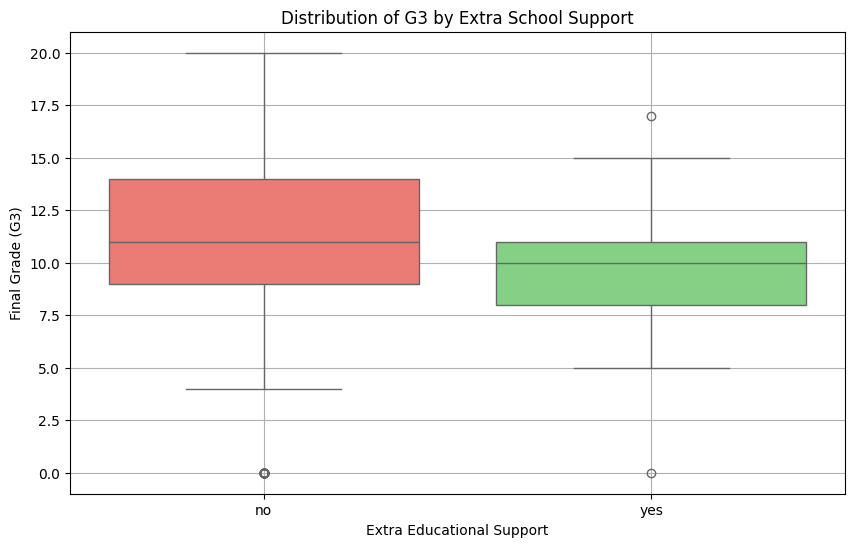

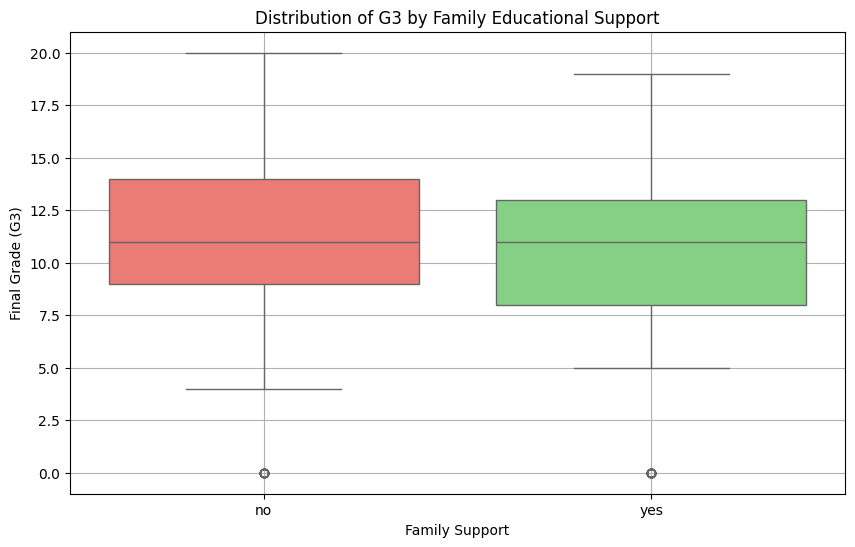

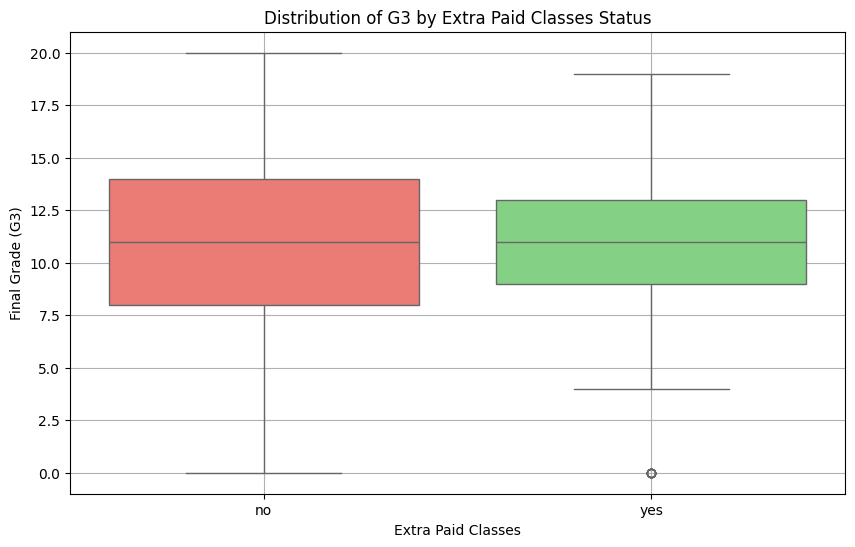

In [266]:
# Create a box plot for G3 by school support
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='schoolsup', y='G3', hue='schoolsup',
            palette={'yes': '#77DD77', 'no': '#FF6961'}, legend=False,
            order=['no', 'yes'])
plt.title('Distribution of G3 by Extra School Support')
plt.xlabel('Extra Educational Support')
plt.ylabel('Final Grade (G3)')
plt.grid()
plt.show()

# Create a box plot for G3 by family support
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='famsup', y='G3', hue='famsup',
            palette={'yes': '#77DD77', 'no': '#FF6961'}, legend=False)
plt.title('Distribution of G3 by Family Educational Support')
plt.xlabel('Family Support')
plt.ylabel('Final Grade (G3)')
plt.grid()
plt.show()

# Create a box plot for G3 by paid class status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='paid', y='G3', hue='paid',
            palette={'yes': '#77DD77', 'no': '#FF6961'}, legend=False)  # Switched colors
plt.title('Distribution of G3 by Extra Paid Classes Status')
plt.xlabel('Extra Paid Classes')
plt.ylabel('Final Grade (G3)')
plt.grid()
plt.show()

Surprisingly, we notice that those who receive support (supplementary from school and/or from family) tend to perform worse than those who do not receive. Although this difference is less noticeable in the difference between students who pay for extra classes and who do not, it goes against my initial intuitive guess. One would assume that a student who receives more support and help, would perform better than those who do not. Perhaps, this reverse result can be explained by scenarios where smarter students choose not to get extra support, or scenarios where those unable to access these resources work harder than those who are able to access these resources.

# Hypothesis Formulation

<b><ins>Hypothesis 1</b></ins>\
$H_0:$ The amount of time a student spends studying does not significantly affect their first period, second period and final grade.\
$H_a:$ The amount of time a student spends studying significantly affects their first period, second period and final grade.

<b><ins>Hypothesis 2</b></ins>\
$H_0:$ Students parental living status does not significantly affect their first period, second period and final grade.\
$H_a:$ Students parental living status significantly affects their first period, second period and final grade.

# Hypothesis Testing

## Hypothesis 1

$H_0:$ The amount of time a student spends studying does not significantly affect their first period, second period and final grade.\
$H_a:$ The amount of time a student spends studying significantly affects their first period, second period and final grade.

We will perform 3 ANOVA tests (one for each grade) for the 4 categories of study time. For this, we are assuming the distribution of students' study times follow a normal distribution, variances between each group remain the same and independence between values. In this case, we would be testing the hypotheses:\
$H_0:$ There is no significant difference in the means of the grades among each study time group.\
$H_a:$ There is a significant difference in the means of the grades among each study time group.

### First Period Grades

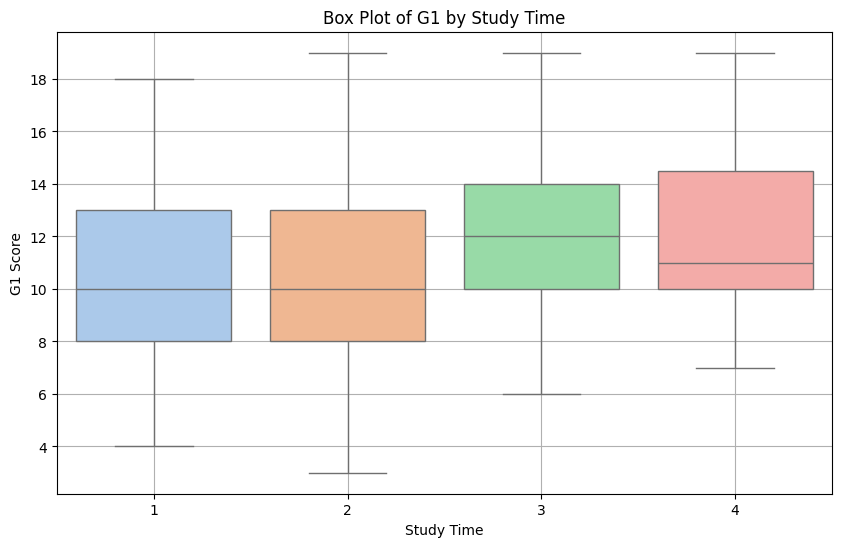

ANOVA for G1: F-statistic=4.55, p-value=0.0038


In [267]:
# Group G1 by studytime
grouped_g1 = [df[df['studytime'] == i]['G1'].dropna() for i in df['studytime'].unique()]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_g1)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G1', data=df, hue='studytime', palette='pastel', legend=False)
plt.title('Box Plot of G1 by Study Time')
plt.xlabel('Study Time')
plt.ylabel('G1 Score')
plt.grid()
plt.show()

print(f"ANOVA for G1: F-statistic={f_statistic:.2f}, p-value={p_value:.4f}")

Since the p-value < 0.05, we can conclude that at a 95% confidence level, we reject the null hypothesis. We can perform a linear regression analysis to further test the relationship between G1 and studytime. 

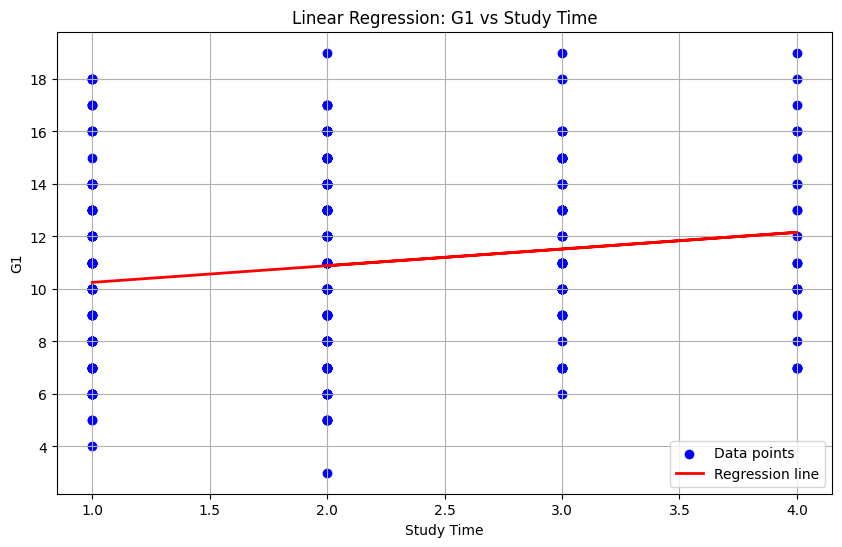

Intercept: 9.615906727242859, Slope: 0.6352199536555574


In [268]:
# Drop rows with missing values in G1 or studytime
df_clean = df.dropna(subset=['G1', 'studytime'])

# Define the independent and dependent variables
X = df_clean['studytime'].values
y = df_clean['G1'].values

# Add a constant term for the intercept
X_b = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X

# Calculate the coefficients using the Normal Equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predictions
y_pred = X_b @ theta_best

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line', linewidth=2)
plt.title('Linear Regression: G1 vs Study Time')
plt.xlabel('Study Time')
plt.ylabel('G1')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients
print(f'Intercept: {theta_best[0]}, Slope: {theta_best[1]}')

We can interpret the slope as for every additional hour of study time, the average G1 score increases by 0.635.

### Second Period Grades

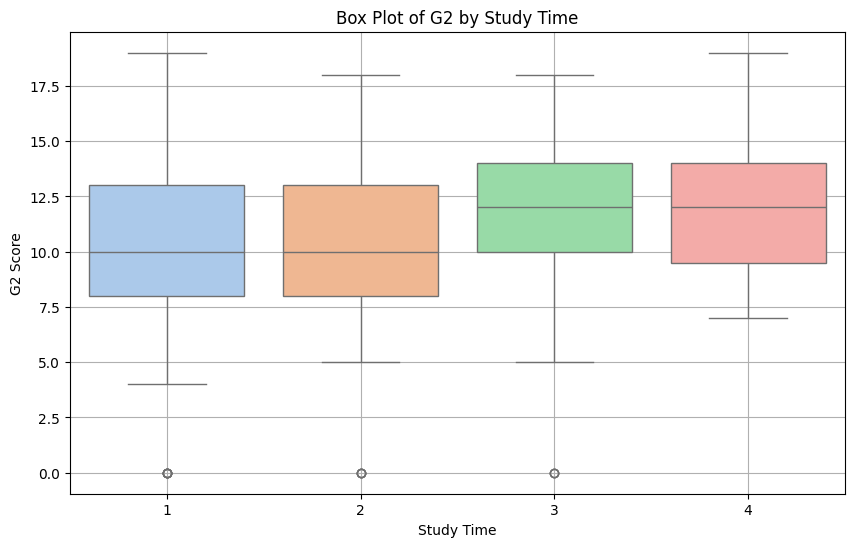

ANOVA for G2: F-statistic=2.79, p-value=0.0402


In [269]:
# Group G2 by studytime
grouped_g2 = [df[df['studytime'] == i]['G2'].dropna() for i in df['studytime'].unique()]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_g2)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G2', data=df, hue='studytime', palette='pastel', legend=False)
plt.title('Box Plot of G2 by Study Time')
plt.xlabel('Study Time')
plt.ylabel('G2 Score')
plt.grid()
plt.show()

print(f"ANOVA for G2: F-statistic={f_statistic:.2f}, p-value={p_value:.4f}")

Since the p-value < 0.05, we can conclude that at a 95% confidence level, we reject the null hypothesis. We can perform a linear regression analysis to further test the relationship between G2 and studytime. 

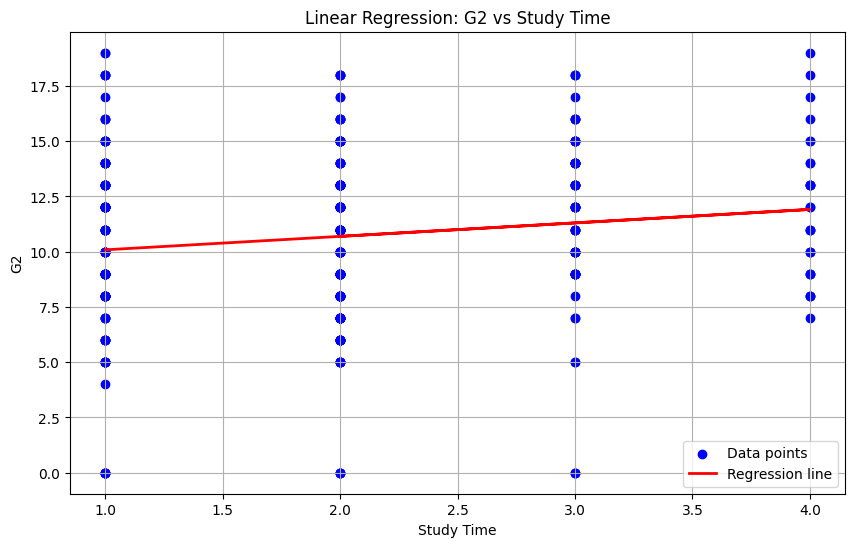

Intercept: 9.474300728009185, Slope: 0.6090189209407582


In [270]:
# Drop rows with missing values in G2 or studytime
df_clean = df.dropna(subset=['G2', 'studytime'])

# Define the independent and dependent variables
X = df_clean['studytime'].values
y = df_clean['G2'].values

# Add a constant term for the intercept
X_b = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X

# Calculate the coefficients using the Normal Equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predictions
y_pred = X_b @ theta_best

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line', linewidth=2)
plt.title('Linear Regression: G2 vs Study Time')
plt.xlabel('Study Time')
plt.ylabel('G2')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients
print(f'Intercept: {theta_best[0]}, Slope: {theta_best[1]}')

We can interpret the slope as for every additional hour of study time, the average G2 score increases by 0.609.

### Final Grades

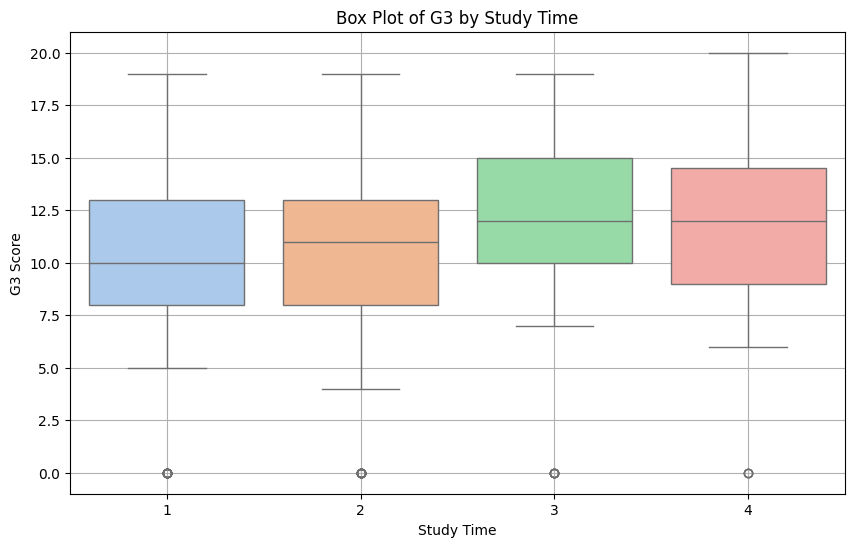

ANOVA for G3: F-statistic=1.73, p-value=0.1607


In [271]:
# Group G3 by studytime
grouped_g3 = [df[df['studytime'] == i]['G3'].dropna() for i in df['studytime'].unique()]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_g3)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=df, hue='studytime', palette='pastel', legend=False)
plt.title('Box Plot of G3 by Study Time')
plt.xlabel('Study Time')
plt.ylabel('G3 Score')
plt.grid()
plt.show()

print(f"ANOVA for G3: F-statistic={f_statistic:.2f}, p-value={p_value:.4f}")

Since the p-value $\not<$ 0.05, we can conclude that at a 95% confidence level, we do not reject the null hypothesis.

### Discussion

We found that the means of first period grades among the study time categories were statistically different. The linear regression showed us that there was a slight positive relationship between study time and first period grades, where one additional hour of study time corresponded to an increase in G1 grade of 0.635.

We found similar results for the second period grades where the means of said grades among the study time categories were also statistically different. The linear regression also showed us that there was a similar slight positive relationship where one additional hour of study time corresponded to an increase in G2 grade of 0.609.

Lastly, we discovered that there is insufficient evidence to conclude that signficant difference in final grade means exists among the study time categories.

## Hypothesis 2

$H_0:$ Students' parental living status does not significantly affect their first period, second period and final grade.\
$H_a:$ Students' parental living status significantly affects their first period, second period and final grade.

We can perform t-tests to compare the means of each grade (G1, G2, G3) between the two categories of living status (T/A). We would be testing the hypotheses:\
$H_0:$ There is no significant difference in the means of grades between students with parents living together and those with parents living apart.\
$H_a:$ There is a significant difference in the means of grades between students with parents living together and those with parents living apart.

### First Period Grades

In [272]:
# Split the data into two groups based on Pstatus
group_T = df[df['Pstatus'] == 'T']['G1']
group_A = df[df['Pstatus'] == 'A']['G1']

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(group_T, group_A)

# Display the results
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

t-statistic: -0.33, p-value: 0.7382


Since p-value $\not<$ 0.05, at a 95% confidence level, we do not reject the null hypothesis for G1.

### Second Period Grades

In [273]:
# Split the data into two groups based on Pstatus
group_T = df[df['Pstatus'] == 'T']['G2']
group_A = df[df['Pstatus'] == 'A']['G2']

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(group_T, group_A)

# Display the results
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

t-statistic: -0.82, p-value: 0.4121


Since p-value $\not<$ 0.05, at a 95% confidence level, we do not reject the null hypothesis for G2.

### Final Grades

In [274]:
# Split the data into two groups based on Pstatus
group_T = df[df['Pstatus'] == 'T']['G3']
group_A = df[df['Pstatus'] == 'A']['G3']

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(group_T, group_A)

# Display the results
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

t-statistic: -1.15, p-value: 0.2501


Since p-value $\not<$ 0.05, at a 95% confidence level, we do not reject the null hypothesis for G3.

### Discussion

For first period, second period and final grades, there was insufficient evidence to show a statistically significant difference in the means of the grades between the two groups (parents living together and parents living apart).

# Conclusions

We were able to find positive relationships between students' first and second period grades and the amount of time they spend studying. However, since the result is so small (<1 mark for every additional hour), we recommend students find other techniques and avenues to increase their grades, especially since we were unable to find a relationship between their final grade and study time. Such possible recommendations could be not relying on support, as the EDA suggests. However, more studies are needed for this. 

We were also unable to find a significant effect of parents living together or apart on students' grades, although the EDA suggests a slight positive relationship between together parents and first and second period grades. However, we would like to point out the small sample size of students with parents who live apart compared to those with parents who live together. Perhaps studies with larger sample sizes will obtain different results.

Theese tests were also done with multiple assumptions such as normality and homogeneity of variance, so perhaps this also affected results.